In [60]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import os
import seaborn as sns

In [ ]:
Saiprasanna Cheedepudi
856496421

In [61]:
#read the dataset
df=pd.read_csv("music.csv")                     #modify the code
df

,age,gender,genre
0,20.0,1.0,HipHop
1,23.0,1.0,HipHop
2,25.0,NaN,NaN
3,26.0,1.0,Jazz
4,29.0,1.0,Jazz
5,30.0,1.0,Jazz
6,31.0,1.0,Classical
7,33.0,1.0,Classical
8,37.0,1.0,Classical
9,20.0,0.0,Dance


step 1 : detecting N\A,Null values



In [62]:
missing_value=['na','N/a',np.nan]    #modify this code
df=pd.read_csv("music.csv",na_values=missing_value )    #modify this code

df.head()

,age,gender,genre
0,20.0,1.0,HipHop
1,23.0,1.0,HipHop
2,25.0,NaN,NaN
3,26.0,1.0,Jazz
4,29.0,1.0,Jazz


In [63]:
df.isnull().sum()

age       1
gender    2
genre     1
dtype: int64

<AxesSubplot:>

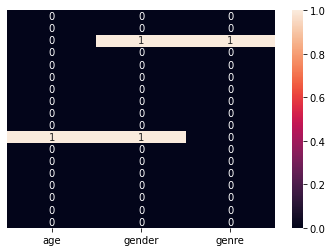

In [64]:
#Generate a heatmap that shoiws the missing value
sns.heatmap(df.isnull(), yticklabels=False,annot=True)  
#modify this line

In [65]:
#drop all rows that have all values as null
df.dropna(how='all')     #modify this line

,age,gender,genre
0,20.0,1.0,HipHop
1,23.0,1.0,HipHop
2,25.0,NaN,NaN
3,26.0,1.0,Jazz
4,29.0,1.0,Jazz
5,30.0,1.0,Jazz
6,31.0,1.0,Classical
7,33.0,1.0,Classical
8,37.0,1.0,Classical
9,20.0,0.0,Dance


In [66]:
#fill the column with missing value with 0
#write your code here
df.fillna(0)

,age,gender,genre
0,20.0,1.0,HipHop
1,23.0,1.0,HipHop
2,25.0,0.0,0
3,26.0,1.0,Jazz
4,29.0,1.0,Jazz
5,30.0,1.0,Jazz
6,31.0,1.0,Classical
7,33.0,1.0,Classical
8,37.0,1.0,Classical
9,20.0,0.0,Dance


In [67]:
##fill the column with missing value with forward/upper value
#write your code here
df.fillna(method="ffill")

,age,gender,genre
0,20.0,1.0,HipHop
1,23.0,1.0,HipHop
2,25.0,1.0,HipHop
3,26.0,1.0,Jazz
4,29.0,1.0,Jazz
5,30.0,1.0,Jazz
6,31.0,1.0,Classical
7,33.0,1.0,Classical
8,37.0,1.0,Classical
9,20.0,0.0,Dance


In [68]:
#fill the column with missing value with backward/lower value
#write your code here
df.fillna(method="bfill")

,age,gender,genre
0,20.0,1.0,HipHop
1,23.0,1.0,HipHop
2,25.0,1.0,Jazz
3,26.0,1.0,Jazz
4,29.0,1.0,Jazz
5,30.0,1.0,Jazz
6,31.0,1.0,Classical
7,33.0,1.0,Classical
8,37.0,1.0,Classical
9,20.0,0.0,Dance


In [69]:
#apply ec==decisiontree classifier and show the output considering value [21,1],[30,0],[42,1]

df=df.dropna()
x=df.drop(columns=['genre'])
y=df['genre']

In [70]:
#Apply deicisontreeclassifier and generate the accuracy score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
score=accuracy_score(predictions,y_test)
score




1.0

In [71]:
model.predict([[21,1],[30,0],[42,1]])

C:\Users\saipr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Acoustic', 'Classical'], dtype=object)

In [72]:
#generate the classification report
#write your code here

print(classification_report(y_test,predictions,digits=3))

              precision    recall  f1-score   support

    Acoustic      1.000     1.000     1.000         1
   Classical      1.000     1.000     1.000         1
       Dance      1.000     1.000     1.000         1
      HipHop      1.000     1.000     1.000         1

    accuracy                          1.000         4
   macro avg      1.000     1.000     1.000         4
weighted avg      1.000     1.000     1.000         4



In [74]:
#generate confusion matrix and show true positive, true negative,
#false positive and false negative score

cfm = confusion_matrix(predictions,y_test)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

Confusion Matrix: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]] 



In [75]:
#Now, instead of Decisiontreeclassifier, 
#use logistic regression ro build your model and generate the accuracy, classification report, 
#confusion matrix and show true positive, true negative,
#false positive and false negative score
#write your code here

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
score=accuracy_score(predictions,y_test)
score


C:\Users\saipr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.25

In [77]:
model.predict([[21,1],[30,0],[42,1]])

C:\Users\saipr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['HipHop', 'Classical', 'Classical'], dtype=object)

In [78]:
print(classification_report(y_test,predictions,digits=3))

              precision    recall  f1-score   support

    Acoustic      1.000     1.000     1.000         1
   Classical      0.000     0.000     0.000         0
       Dance      0.000     0.000     0.000         1
      HipHop      0.000     0.000     0.000         0
        Jazz      0.000     0.000     0.000         2

    accuracy                          0.250         4
   macro avg      0.200     0.200     0.200         4
weighted avg      0.250     0.250     0.250         4



C:\Users\saipr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saipr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saipr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saipr\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [79]:
cfm = confusion_matrix(predictions,y_test)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

Confusion Matrix: 
 [[1 0 0 0 0]
 [0 0 0 0 2]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]] 

